## **Dataset: Wholesale Customers Data**  
- **Dataset:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  



In [1]:
import pandas as pd
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features].copy()


In [3]:
print(X.isnull().sum())


Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#StandardScaler

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

#

#Elbow method and Silhouette method

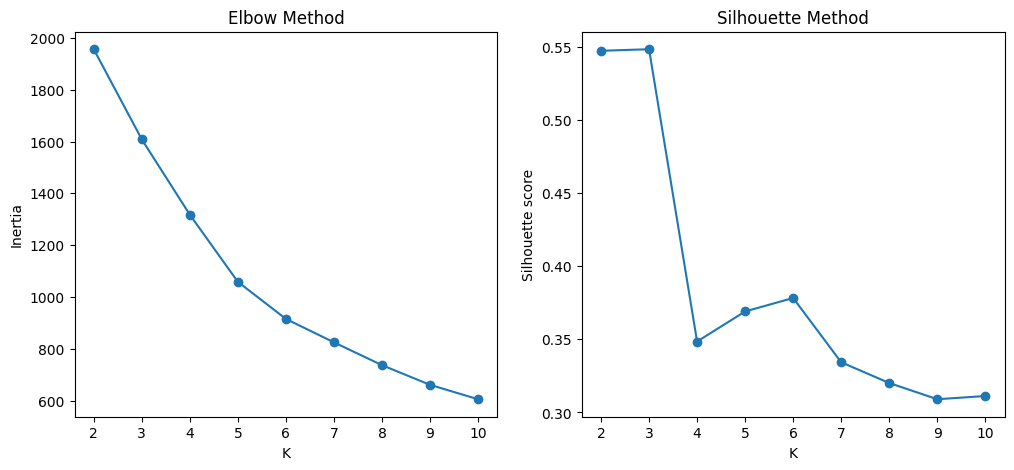

In [6]:
inertia = []
sil_scores = []
K_range = range(2,11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, "o-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, "o-")
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.title("Silhouette Method")
plt.show()


#K-Means Clustering

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

print("K-Means cluster profiles:")
print(df.groupby("KMeans_Cluster")[features].mean())


sil_kmeans = silhouette_score(X_scaled, df["KMeans_Cluster"])
print("Silhouette Score (K-Means):", sil_kmeans)


K-Means cluster profiles:
                       Fresh          Milk       Grocery        Frozen  \
KMeans_Cluster                                                           
0               10440.933333  19386.422222  28656.088889   2190.244444   
1               12062.913486   4115.099237   5534.966921   2940.676845   
2               34782.000000  30367.000000  16898.000000  48701.500000   

                Detergents_Paper    Delicassen  
KMeans_Cluster                                  
0                   13327.800000   2374.200000  
1                    1696.170483   1299.114504  
2                     755.500000  26776.000000  
Silhouette Score (K-Means): 0.5482872649700601


#Hierarchical Clustering

In [8]:
hier = AgglomerativeClustering(n_clusters=3, linkage="ward")
df["Hier_Cluster"] = hier.fit_predict(X_scaled)

print(df.groupby("Hier_Cluster")[features].mean())
sil_kmeans = silhouette_score(X_scaled, df["Hier_Cluster"])
print("Silhouette Score (Hier):", sil_kmeans)


                     Fresh          Milk       Grocery       Frozen  \
Hier_Cluster                                                          
0             27477.000000  43542.166667  54588.500000  8285.666667   
1             15048.932384   3017.298932   3791.761566  3837.316726   
2              5794.241830   9419.888889  13761.738562  1461.764706   

              Detergents_Paper    Delicassen  
Hier_Cluster                                  
0                 25018.333333  10247.833333  
1                   758.007117   1309.900356  
2                  5913.379085   1577.607843  
Silhouette Score (Hier): 0.2646091480214908


#Dendrogram

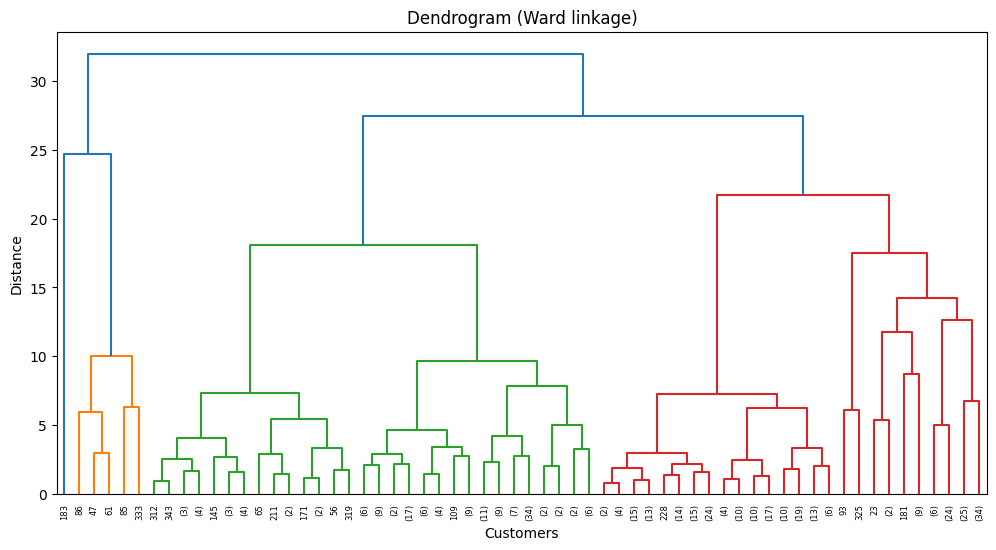

In [18]:
Z = linkage(X_scaled, method="ward")

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode="level", p=6)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


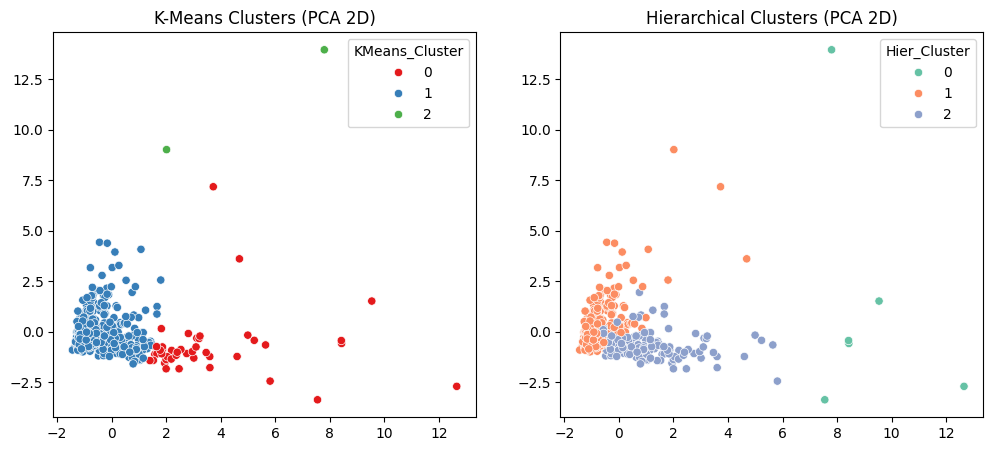

In [10]:
import seaborn as sns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# KMeans
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["KMeans_Cluster"], palette="Set1")
plt.title("K-Means Clusters (PCA 2D)")

# Hierarchical
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Hier_Cluster"], palette="Set2")
plt.title("Hierarchical Clusters (PCA 2D)")

plt.show()


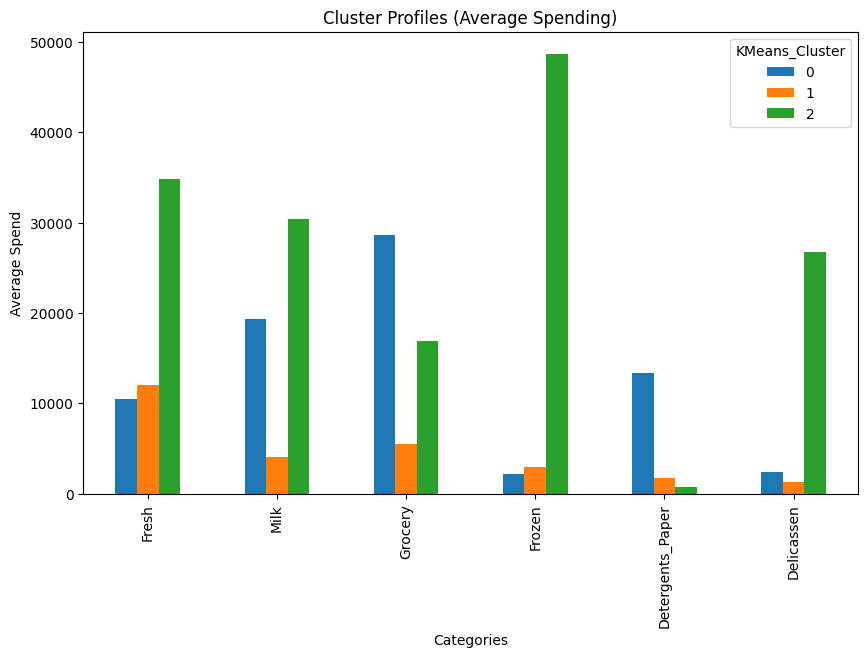

In [11]:
import matplotlib.pyplot as plt

# Calculate the cluster profiles (mean spending for each cluster)
cluster_profile = df.groupby("KMeans_Cluster")[features].mean()

cluster_profile.T.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiles (Average Spending)")
plt.ylabel("Average Spend")
plt.xlabel("Categories")
plt.show()

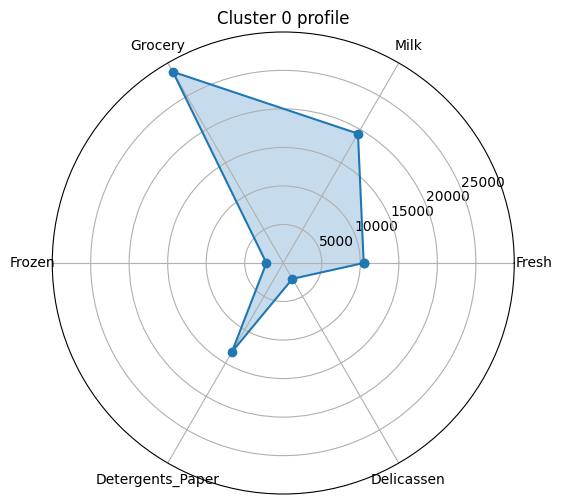

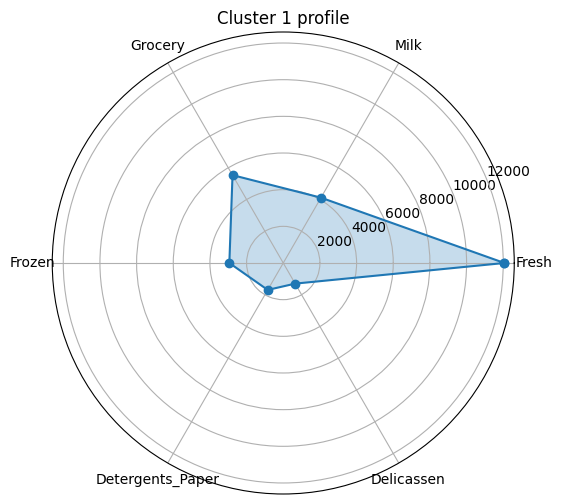

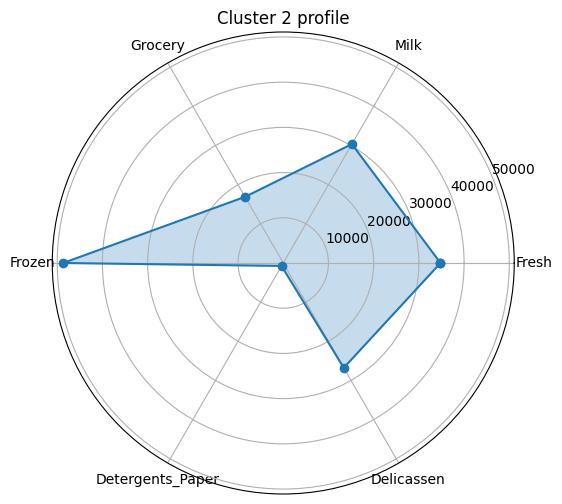

In [12]:
def plot_radar(row, categories, title):
    values = row.values.tolist()
    values += values[:1]
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, 'o-')
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.set_title(title)
    plt.show()

categories = features
for cluster in cluster_profile.index:
    plot_radar(cluster_profile.loc[cluster], categories, f"Cluster {cluster} profile")

In [13]:
top_feature = cluster_profile.idxmax(axis=1)
print(top_feature)

KMeans_Cluster
0    Grocery
1      Fresh
2     Frozen
dtype: object


In [14]:
top2_features = cluster_profile.apply(lambda row: row.nlargest(2).index.tolist(), axis=1)
print(top2_features)

KMeans_Cluster
0     [Grocery, Milk]
1    [Fresh, Grocery]
2     [Frozen, Fresh]
dtype: object
